In [134]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay


In [135]:
df = pd.read_csv("./diabetes.csv")
x = df.drop("Outcome",axis=1)
y = df["Outcome"]

In [136]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2)

scalar = StandardScaler()
x_train_scaled = scalar.fit_transform(x_train)
x_test_scaled = scalar.fit_transform(x_test)


In [137]:
mlp = MLPClassifier(hidden_layer_sizes=(100,),activation='relu',solver='adam',max_iter=200,random_state=42)
mlp.fit(x_train_scaled,y_train)

y_pred_test = mlp.predict(x_test_scaled)
print("Score (simple MLP) :",mlp.score(x_test_scaled,y_test))

cm = confusion_matrix(y_test,y_pred_test)
print("Confusion matrix:\n", cm)

Score (simple MLP) : 0.7337662337662337
Confusion matrix:
 [[84 17]
 [24 29]]


c:\Users\Ben\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.83      0.80       101
           1       0.63      0.55      0.59        53

    accuracy                           0.73       154
   macro avg       0.70      0.69      0.69       154
weighted avg       0.73      0.73      0.73       154



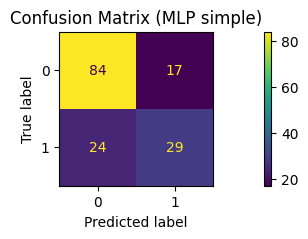

In [138]:
fig, (ax1) = plt.subplots(1, 1, figsize=(13, 2))

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(ax=ax1)
ax1.set_title("Confusion Matrix (MLP simple)")
print("Classification Report:\n", classification_report(y_test, y_pred_test))


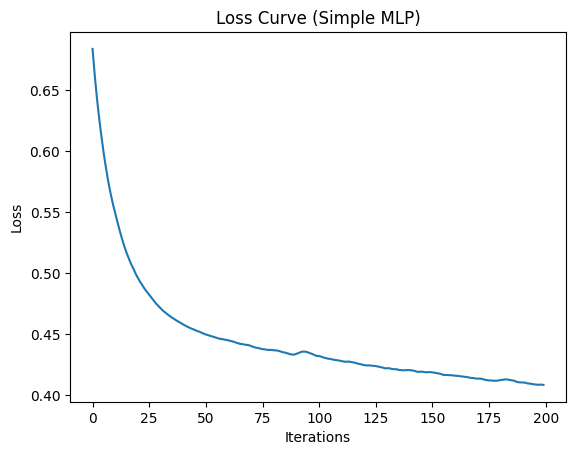

In [139]:
plt.plot(mlp.loss_curve_)
plt.title("Loss Curve (Simple MLP)")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.show()

In [140]:
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (100,50), (100,100)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'max_iter': [300]
}

mlp_gs = MLPClassifier(random_state=42)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
Best hyperparametres :
 {'activation': 'tanh', 'hidden_layer_sizes': (100, 100), 'max_iter': 300, 'solver': 'adam'}
Best score (CV) : 0.7883229714650088
Score on test data with the best model : 0.7662337662337663


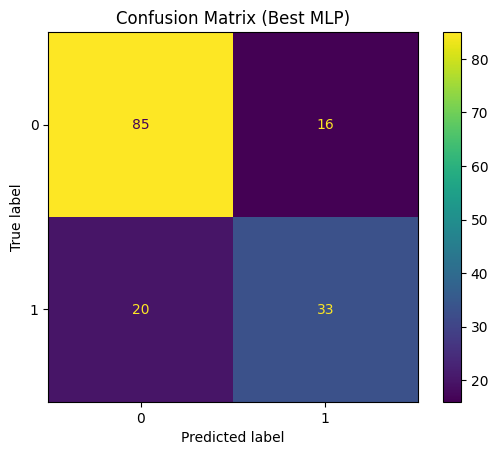

Classification Report (Best MLP):
               precision    recall  f1-score   support

           0       0.81      0.84      0.83       101
           1       0.67      0.62      0.65        53

    accuracy                           0.77       154
   macro avg       0.74      0.73      0.74       154
weighted avg       0.76      0.77      0.76       154



In [141]:
grid_search = GridSearchCV(
    mlp_gs,
    param_grid,
    scoring='accuracy',
    n_jobs=-1,   # use all CPUs to go faster
    cv=3,        # cross-validation in 3 subsets, we can increase if we want more reliability (and more calculation time)
    verbose=1
)

grid_search.fit(x_train_scaled, y_train)
print("Best hyperparametres :\n", grid_search.best_params_)
print("Best score (CV) :", grid_search.best_score_)

best_mlp = grid_search.best_estimator_
test_score = best_mlp.score(x_test_scaled, y_test)
print("Score on test data with the best model :", test_score)

y_pred_best = best_mlp.predict(x_test_scaled)
cm_best = confusion_matrix(y_test, y_pred_best)
disp_best = ConfusionMatrixDisplay(confusion_matrix=cm_best)
disp_best.plot()
plt.title("Confusion Matrix (Best MLP)")
plt.show()

print("Classification Report (Best MLP):\n", classification_report(y_test, y_pred_best))